<a href="https://colab.research.google.com/github/Subha-CJPR/Subha-CJPR/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

In [4]:
df=pd.read_csv('IPL Matches 2008-2020.csv')

In [5]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
df.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [7]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [9]:
df[df['city']=='Kolkata']

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
15,335997,Kolkata,2008-04-29,ST Jayasuriya,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,Mumbai Indians,wickets,7.0,N,NaN,BF Bowden,AV Jayaprakash
28,336010,Kolkata,2008-05-08,SC Ganguly,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,5.0,N,NaN,Asad Rauf,IL Howell
35,336017,Kolkata,2008-05-13,Shoaib Akhtar,Eden Gardens,0,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,23.0,N,NaN,Asad Rauf,IL Howell
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,1178401,Kolkata,2019-04-12,S Dhawan,Eden Gardens,0,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,7.0,N,NaN,YC Barde,CK Nandan
724,1178404,Kolkata,2019-04-14,Imran Tahir,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,RJ Tucker,CK Nandan
730,1178410,Kolkata,2019-04-19,V Kohli,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Royal Challengers Bangalore,runs,10.0,N,NaN,IJ Gould,Nitin Menon
738,1178418,Kolkata,2019-04-25,VR Aaron,Eden Gardens,0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,AY Dandekar,IJ Gould


In [20]:
df[(df['team2']=='Chennai Super Kings')& (df['team1']=='Kolkata Knight Riders')]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
122,419113,Kolkata,2010-03-16,MS Dhoni,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,55.0,N,NaN,HDPK Dharmasena,AM Saheba
221,501245,Kolkata,2011-05-07,Iqbal Abdulla,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,N,D/L,Asad Rauf,PR Reiffel
308,548368,Kolkata,2012-05-14,MEK Hussey,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,JD Cloete,SJA Taufel
321,548381,Chennai,2012-05-27,MS Bisla,"MA Chidambaram Stadium, Chepauk",0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,SJA Taufel
346,598022,Kolkata,2013-04-20,RA Jadeja,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,4.0,N,NaN,Asad Rauf,AK Chaudhary
444,734023,Kolkata,2014-05-20,RV Uthappa,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,8.0,N,NaN,RM Deshpande,C Shamshuddin
467,829723,Kolkata,2015-04-30,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,N,NaN,AK Chaudhary,M Erasmus
668,1136593,Kolkata,2018-05-03,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,A Deshmukh
724,1178404,Kolkata,2019-04-14,Imran Tahir,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,RJ Tucker,CK Nandan


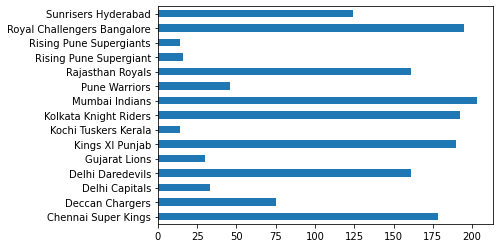

In [22]:
x = df['team1'].value_counts()
y = df['team2'].value_counts()
(x+y).plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

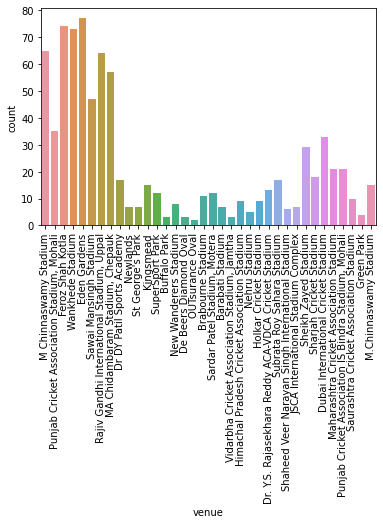

In [23]:
sns.countplot('venue', data=df)
plt.xticks(rotation='vertical')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

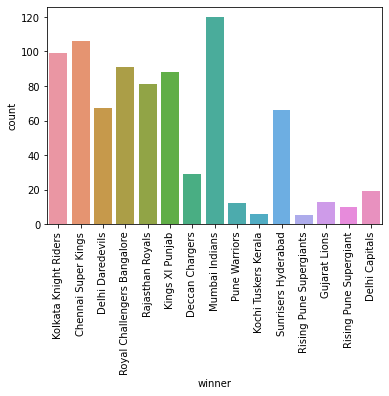

In [24]:
sns.countplot('winner', data=df)
plt.xticks(rotation='vertical')

In [26]:
delivery=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [31]:
all_teams = df['team1'].tolist() + df['team2'].tolist()
all_teams = list(set(all_teams))
len(all_teams)

15

In [38]:
df['eliminator'].value_counts(814)*100

N    98.399015
Y     1.600985
Name: eliminator, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


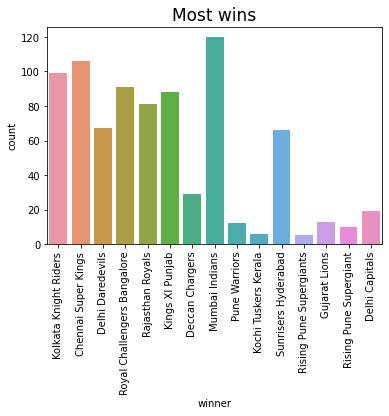

In [40]:
sns.countplot(df['winner'],data=df)
plt.title("Most wins",fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [101]:
mi_vs_csk=df[((df['team2']=='Chennai Super Kings')&(df['team1']=='MumbaiIndians')) | ((df['team1']=='Chennai Super Kings')&(df['team2']=='Mumbai Indians')) ]

In [99]:
#mi_vs_csk

In [102]:
csk=(mi_vs_csk['winner']=='Chennai Super Kings')

In [75]:
(mi_vs_csk['winner']=='Mumbai Indians').value_counts()

True     9
False    8
Name: winner, dtype: int64

In [64]:
mi_vs_csk.count()

id                 17
city               16
date               17
player_of_match    17
venue              17
neutral_venue      17
team1              17
team2              17
toss_winner        17
toss_decision      17
winner             17
result             17
result_margin      17
eliminator         17
method              0
umpire1            17
umpire2            17
dtype: int64

In [103]:
csk.value_counts()

False    9
True     8
Name: winner, dtype: int64

In [104]:
csk_vs_kkr=df[((df['team2']=='Chennai Super Kings')&(df['team1']=='Kolkata Knight Riders')) | ((df['team1']=='Chennai Super Kings')&(df['team2']=='Kolkata Knight Riders')) ]

In [87]:
kkr=csk_vs_kkr['winner']=='Kolkata Knight Riders'

In [105]:
Csk=csk_vs_kkr['winner']=='Chennai Super kings'

In [96]:
kkr

11     False
43     False
106     True
122    False
162    False
175    False
221     True
287     True
308    False
321     True
346    False
358    False
418    False
444     True
467     True
487    False
640    False
668     True
718    False
724    False
765     True
800    False
Name: winner, dtype: bool

In [106]:
csk

7       True
58     False
102     True
151     True
174     True
248    False
319     True
326    False
394     True
397    False
410     True
455     True
499    False
513    False
662    False
739    False
785    False
Name: winner, dtype: bool

In [107]:
Csk

11     False
43     False
106    False
122    False
162    False
175    False
221    False
287    False
308    False
321    False
346    False
358    False
418    False
444    False
467    False
487    False
640    False
668    False
718    False
724    False
765    False
800    False
Name: winner, dtype: bool

In [108]:
delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [111]:
temp_df = delivery.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(20)

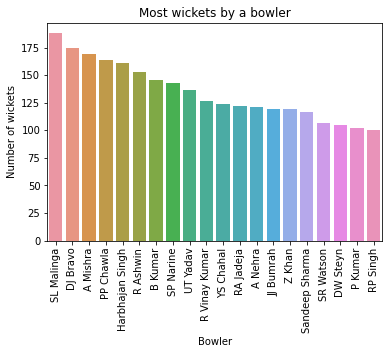

In [112]:
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()

In [114]:
delivery.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).

,bowler,is_wicket
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
...,...,...
415,RR Bose,0
416,RR Bhatkal,0
417,RA Tripathi,0
418,RA Shaikh,0


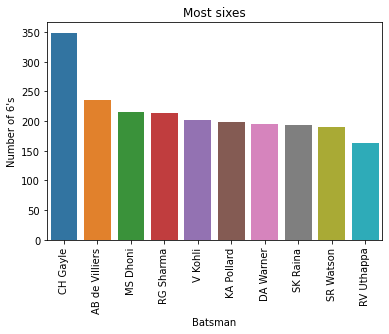

In [115]:
temp_df = delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 6's")
plt.show()


In [129]:
six=delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)

In [130]:
six

,batsman,batsman_runs
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202
...,...,...
532,S Badree,0
533,CV Varun,0
534,S Chanderpaul,0
535,CRD Fernando,0


In [128]:
pd.Series.sum(six['batsman_runs'])

8902

In [134]:
four=delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).head(20)

In [132]:
four

,batsman,batsman_runs
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492
...,...,...
532,BMAJ Mendis,0
533,RK Bhui,0
534,BE Hendricks,0
535,RR Bhatkal,0


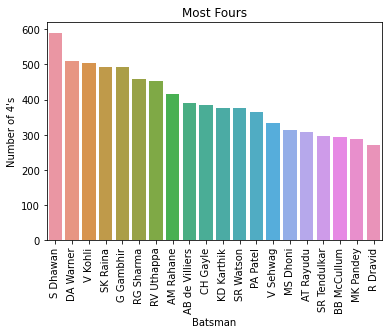

In [135]:
sns.barplot(x=four['batsman'],y=four['batsman_runs'],data=four)

plt.title("Most Fours")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 4's")
plt.show()


In [136]:
four=delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)

In [139]:
pd.Series.sum(four['batsman_runs'])

21908